# Random Forest

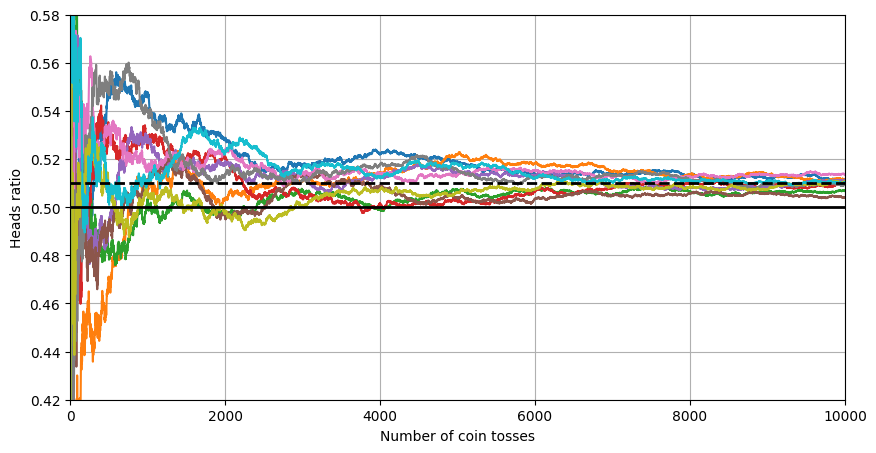

In [1]:
import numpy as np
import matplotlib.pyplot as plt

head_probs = 0.51
np.random.seed(42)

coin_tosses = (np.random.rand(10000, 10) < head_probs).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], 'k--', linewidth=2, label='51%')
plt.plot([0, 10000], [0.5, 0.5], 'k-', linewidth=2, label='50%')
plt.xlabel('Number of coin tosses')
plt.ylabel("Heads ratio")
plt.grid()
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

In [2]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("svc", SVC(random_state=42, probability=True)),
        ("dt", DecisionTreeClassifier(max_depth=2)),
    ],
    voting="soft",
)

voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [3]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'{name} = {clf.score(X_test, y_test)}')

lr = 0.864
rf = 0.896
svc = 0.896
dt = 0.896


In [4]:
voting_clf.predict(X_test[:1])

array([1])

In [5]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0]), array([1])]

In [6]:
voting_clf.score(X_test, y_test)

0.92

## Bagging and Pasting 

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    n_jobs=1,
    random_state=42,
)

bag_clf.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,100
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,1
,random_state,42
,verbose,0


### OOB Evaluation

In [11]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500,
    max_samples=100,
    n_jobs=1,
    random_state=42,
    oob_score=True
)

bag_clf.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,100
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,True
,warm_start,False
,n_jobs,1
,random_state,42
,verbose,0


In [12]:
bag_clf.oob_score_

0.9253333333333333